In [1]:
import pandas as pd

In [2]:
lst_str_cols = ['WHEELS_OFF', 'WHEELS_ON', 'AIR_TIME', 'scheduledDeparture_key', 'scheduledArrival_key', 'dateKey']
dict_dtypes = {x: 'str' for x in lst_str_cols}

fact = pd.read_csv('flights_fact.csv', dtype=dict_dtypes)

/var/folders/v7/cd7r3hf1229b9tnytv_qr8hm0000gn/T/ipykernel_18340/711728911.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  fact = pd.read_csv('flights_fact.csv', dtype=dict_dtypes)


In [3]:
fact.shape

(5819079, 33)

In [4]:
# fact.describe()

In [5]:
fact['TAXI_IN']

0           4.0
1           4.0
2          11.0
3           8.0
4           5.0
           ... 
5819074     4.0
5819075     3.0
5819076     8.0
5819077     3.0
5819078     5.0
Name: TAXI_IN, Length: 5819079, dtype: float64

array([[<AxesSubplot:title={'center':'DEPARTURE_DELAY'}>,
        <AxesSubplot:title={'center':'TAXI_OUT'}>,
        <AxesSubplot:title={'center':'SCHEDULED_TIME'}>,
        <AxesSubplot:title={'center':'ELAPSED_TIME'}>],
       [<AxesSubplot:title={'center':'DISTANCE'}>,
        <AxesSubplot:title={'center':'TAXI_IN'}>,
        <AxesSubplot:title={'center':'ARRIVAL_TIME'}>,
        <AxesSubplot:title={'center':'ARRIVAL_DELAY'}>],
       [<AxesSubplot:title={'center':'DIVERTED'}>,
        <AxesSubplot:title={'center':'CANCELLED'}>,
        <AxesSubplot:title={'center':'AIR_SYSTEM_DELAY'}>,
        <AxesSubplot:title={'center':'SECURITY_DELAY'}>],
       [<AxesSubplot:title={'center':'AIRLINE_DELAY'}>,
        <AxesSubplot:title={'center':'LATE_AIRCRAFT_DELAY'}>,
        <AxesSubplot:title={'center':'WEATHER_DELAY'}>,
        <AxesSubplot:title={'center':'dateKey'}>]], dtype=object)

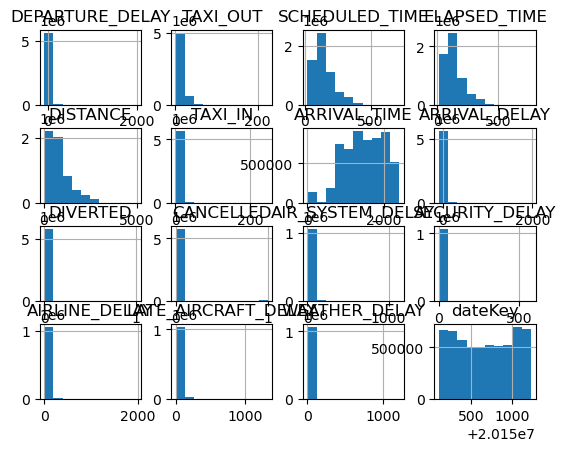

In [6]:
fact.loc[:,'DEPARTURE_DELAY':].hist()

In [7]:
fact = fact[(fact['DEPARTURE_DELAY'] <= fact['DEPARTURE_DELAY'].quantile(0.95)) & 
           (fact['DEPARTURE_DELAY'] >= fact['DEPARTURE_DELAY'].quantile(0.01))]

In [8]:
fact = fact[(fact['ARRIVAL_DELAY'] <= fact['ARRIVAL_DELAY'].quantile(0.97)) & 
           (fact['ARRIVAL_DELAY'] >= fact['ARRIVAL_DELAY'].quantile(0.01))]

In [9]:
fact = fact[(fact['TAXI_IN'] <= fact['TAXI_IN'].quantile(0.97)) & 
           (fact['TAXI_IN'] >= fact['TAXI_IN'].quantile(0.005))]

KeyboardInterrupt: 

In [ ]:
fact = fact[(fact['TAXI_OUT'] <= fact['TAXI_OUT'].quantile(0.97)) & 
           (fact['TAXI_OUT'] >= fact['TAXI_OUT'].quantile(0.005))]

In [ ]:
fact['WEATHER_DELAY'].hist(), fact['WEATHER_DELAY'].quantile(0.95), fact['WEATHER_DELAY'].quantile(0.01)

In [ ]:
fact['DEPARTURE_DELAY'].hist(), fact['DEPARTURE_DELAY'].quantile(0.95)

In [ ]:
fact['WHEELS_ON']

In [ ]:
fact.loc[:,['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'WHEELS_OFF', 'AIR_TIME', 'WHEELS_ON']].head(8)

In [ ]:
fact.shape

In [ ]:
fact.hist()

In [ ]:
import matplotlib.pyplot as plt
ax = fact['ARRIVAL_DELAY'].hist()
plt.vlines(x = 15, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors='black')
plt.vlines(x = -10, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors='black')

In [ ]:
fact['ARRIVAL_DELAY'].mean()

In [ ]:
early = fact['ARRIVAL_DELAY'].le(-10).mean() 
delayed = fact['ARRIVAL_DELAY'].ge(15).mean()
on_time = fact['ARRIVAL_DELAY'].between(-10, 15, inclusive='both').mean()

print(f'{early * 100:.2f}% of flights are early')
print(f'{on_time * 100:.2f}% of flights are on-time')
print(f'{delayed * 100:.2f}% of flights are delayed')

In [ ]:
on_time

In [ ]:
fact['early'] = 0 
fact['on_time'] = 0
fact['delayed'] = 0 

In [ ]:
fact['early'] = fact['ARRIVAL_DELAY'].apply(lambda x: 1 if (x < -10)else 0 )
fact['on_time'] = fact['ARRIVAL_DELAY'].apply(lambda x: 1 if ((x >= -10) & (x <= 10))else 0 )
fact['delayed'] = fact['ARRIVAL_DELAY'].apply(lambda x: 1 if ( x >= 10 ) else 0 )

In [ ]:
fact['new_delay'] = fact['ARRIVAL_DELAY'].apply(lambda x: 0 if ((x >= -10) & (x <= 10))else x )

In [ ]:
fact['early'].mean()

In [ ]:
fact['early'].mean() + fact['on_time'].mean()  + fact['delayed'].mean()

In [ ]:
fact.to_csv('flights_fact.csv', index=False)